# **[Excercise 2]** Energy System Analysis and Evaluation
In this notebook you are prompted to **understand the basics of data science** to examine *time series data* and aggregate it. Furthermore you are required to learn **basic financial mathematics** to evaluate the *profitability of financial assets*.

Furthermore we will cover the following Python basics:
- [x] Matplotlib
- [x] Pandas
- [x] Dictionaries
- [x] Classes

In [1]:
import pandas as pd
df_hw = pd.read_csv(filepath_or_buffer="C:/Users/s.kortmann/Coding/Vorlesungen/MES/excercise_2/data/profiles/CHR01/Results/devices_profiles_warm_water.csv", sep=";", index_col=[0])
# combine the time columns into a single datetime column
df_hw["Time"] = pd.to_datetime(df_hw['Time'])
df_hw = df_hw.set_index("Time")

<AxesSubplot: xlabel='Time'>

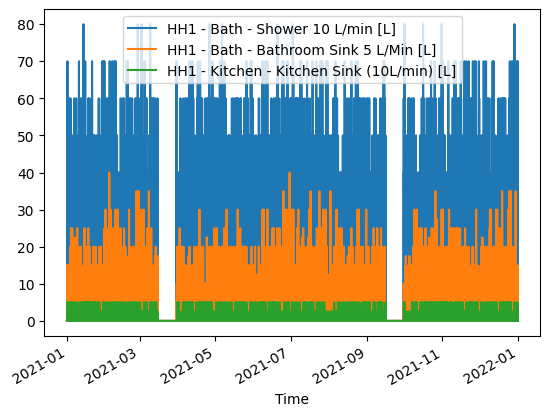

In [2]:
import matplotlib.pyplot as plt
df_hw = df_hw[df_hw.columns[::-1]]
df_hw.plot()

In [3]:
df_hw.sum()

HH1 - Bath - Shower 10 L/min [L]              50530.0
HH1 - Bath - Bathroom Sink 5 L/Min [L]        32105.0
HH1 - Kitchen - Kitchen Sink (10L/min) [L]     6997.5
dtype: float64

### Task 1.1
Identify the maximum and total amount of hot water that is used by the househould and save it in two variables called `max_hw_demand` and `total_hw_demand`.

In [4]:
max_hw_demand = df_hw.sum(axis=1).max()
total_hw_demand = df_hw.sum().sum()

The Heating Degree Days (HDD) is a measure of how much heating is needed to maintain a comfortable temperature inside a building or structure. It is calculated by subtracting a base temperature from the average daily temperature, then summing up all the positive differences over a certain period of time.

In [5]:
def calc_hdd(temps, base_temp):
    hdd = 0
    for temp in temps:
        if temp < base_temp:
            hdd += 1
    return hdd

In [6]:
from utils import getTemperatures

# Define some Locations to choose from in Latitude and Longitude
locations = {
    'Greifswald': ['54.143879', '13.645449'],
    'Aachen' : ['50.778620', '6.075170']
}
start_date = "2021-01-01"
end_date = "2021-12-31"

# Make a dictionary with the locations as keys and the getTemperatures() function as values
location2data = {}
for location in locations:
    location2data[location] = getTemperatures(locations, location, start_date, end_date)

In [7]:
hourly_temperatures = location2data["Aachen"][1]
daily_average_temperatures = []
daily_total = 0
count = 0

for temperature in hourly_temperatures:
    daily_total += temperature
    count += 1
    if count == 24:
        daily_average = daily_total / 24
        daily_average_temperatures.append(daily_average)
        daily_total = 0
        count = 0

In [8]:
hdd_aachen = calc_hdd(daily_average_temperatures, 15)
hdd_aachen

257

In [9]:
crf = 0.8

## Task 2.6
Calculate the yearly, weather-adjusted room-heating demand for the building energy system.

In [10]:
q_adj_rm_total = total_hw_demand/crf
q_adj_rm_total

112040.625

## Task 2.7
Calculate the maximum heat load for the room-heating demand, then calculate the total maxmimum heating demand in combination with the warm-water demand. \
_Hint: The warm-water demand can be for simplicity taken as given, thereby no weather-adjustment is necessary._

In [11]:
q_adj_rm_max = max_hw_demand/crf
q_adj_rm_max

q_adj_total_max = max_hw_demand + q_adj_rm_max
q_adj_total_max

225.0

____
# Economic evaluation
Essential condition for choosing a suitable heating technology for the Potter family is a financially viable solution. As an alternative to the net present value method (see exercise 1) a com-monly used method for energy system evaluation is the annuity method, assuming cash flows are equal for $t=1, \dots, T$. Therefore the Annuity can be calculated with:
$$ ANN = I_0 + AF + \text{cash flow}_t = \frac{I_0}{PVF} + \text{cash flow}_t $$
where $i$ is the interest rate, $T$ is the liftime of the asset and the annuity factor $ AF = \frac{(1+i)^T-1}{(1+i)^T \cdot i} $.

## Task 2.0
Write the function to calculte the annuity factor. Use the utils.py file to allow later usage accross othe Jupyter notebooks.

#### Specifications for the gas condensing boiler

<center>

Specification | Index | Unit | Value
--- | --- | --- | ---
Thermal efficiency | $\eta_{th}$ | [\%] | 92
Installation costs | $c_{GCB}^{tech}$ | [€] | 1500
Variable costs | $c_{GCB}^{var,asset}$ | [€/$kW_{th}$] | 115
Fuel costs | $c_{ng}^{fuel}$ | [ct. €/$kWh$] | 7
Maintenance and insurance costs | $c_{mni}^{gcb}$ | [€/a] | 1000
Expected asset lifetime | $T$ | [a] | 30

</center>

#### Specifications for the pellet heater

<center>

Specification | Index | Unit | Value
--- | --- | --- | ---
Thermal efficiency | $\eta_{th}$ | [\%] | 90
Installation costs | $c_{PEH}^{tech}$ | [€] | 2000
Fixed capital costs | $c_{PEH}^{fix,asset}$ | [€] | 6000
Variable costs | $c_{PEH}^{var,asset}$ | [€/$kW_{th}$] | 150
Fuel costs | $c_{pellet}^{fuel}$ | [ct. €/$kWh$] | 7
Maintenance and insurance costs | $c_{mni}^{gcb}$ | [€/a] | 1000
Expected asset lifetime | $T$ | [a] | 30

</center>

#### Specifications for the air-water heat pump

<center>

Specification | Index | Unit | Value
--- | --- | --- | ---
Coefficient of performance | $COP_{AHP}$ | [$kW_{th}$/$kW_{el}$] | 2.7
Installation costs | $c_{AHP}^{tech}$ | [€] | 2000
Fixed capital costs | $c_{AHP}^{fix}$ | [€] | 4000
Variable costs | $c_{AHP}^{var,asset}$ | [€/$kW_{el}$] | 629
Fuel costs | $c_{el}^{fuel}$ | [ct. €/$kWh$] | 30
Maintenance and insurance costs | $c_{mni}^{AHP}$ | [€/a] | 200
Expected asset lifetime | $T$ | [a] | 25

</center>

#### Specifications for the brine-water heat pump

<center>

Specification | Index | Unit | Value
--- | --- | --- | ---
Coefficient of performance | $COP_{BHP}$ | [$kW_{th}$/$kW_{el}$] | 3.5
Installation costs | $c_{BHP}^{tech}$ | [€] | 4000
Fixed capital costs | $c_{BHP}^{probe}$ | [€] | 8000
Variable costs | $c_{BHP}^{var,asset}$ | [€/$kW_{th}$] | 900
Fuel costs | $c_{el}^{fuel}$ | [ct. €/$kWh$] | 30
Maintenance and insurance costs | $c_{mni}^{gcb}$ | [€/a] | 200
Expected asset lifetime | $T$ | [a] | 30

</center>

In [12]:
tech_heat = {
    "gcb" : {
        "commodity" : "natural_gas",
        "eff_th" : 92,
        "c_inst" : 1500,
        "c_var" : 115,
        "c_fuel" : 7,
        "c_mni" : 1000,
        "lifetime" : 30
    },
    "pellet" : {
        "commodity" : "pellet",
        "eff_th" : 90,
        "c_inst" : 2000,
        "c_fix" : 6000,
        "c_var" : 150,
        "c_fuel" : 7,
        "c_mni" : 1000,
        "T" : 30
    },
    "aw_hp" : {
        "commodity" : "electricity",
        "COP" : 2.7,
        "c_inst" : 2000,
        "c_fix" : 4000,
        "c_var" : 629,
        "c_fuel" : 26,
        "c_mni" : 200,
        "T" : 25
    },
    "bw_hp" : {
        "commodity" : "electricity",
        "COP" : 3.5,
        "c_inst" : 4000,
        "c_fix" : 8000,
        "c_var" : 900,
        "c_fuel" : 26,
        "c_mni" : 200,
        "T" : 25
    }
}

In [13]:
tech_heat["gcb"]["lifetime"]

30

## Task 2.8
Calculate the yearly costs of heat supply for a reinvest in the same heating technology. Assume a higher efficiency of the new gas condensing boiler with $\eta_n$=97%, but same costs. The internal rate of return is $i$ = 5%.

$$ CAPEX_{gcb} = c_{gcb}^{tech} + c_{gcb}^{var,asset} \cdot P_{gcb} $$
$$ OPEX_{gcb} = c_{gas}^{fuel} \cdot \frac{Q_{try}^{RH}+Q_{WW}}{\eta_{th}} $$

In [14]:
from utils import annuity_factor
interest_rate = 0.05

In [15]:
class gcb:
    def __init__(self, tech_dict: dict):
        self.eff_th = tech_dict["eff_th"]
        self.c_inst = tech_dict["c_inst"]
        self.c_var = tech_dict["c_var"]
        self.c_fuel = tech_dict["c_fuel"]
        self.c_mni = tech_dict["c_mni"]
        self.lifetime = tech_dict["lifetime"]
        
    def CAPEX(self, P_inst):
        return self.c_inst + self.c_var * P_inst
    
    # alternative
    @staticmethod
    def static_CAPEX(tech_dict: dict, P_inst):
        return tech_dict["c_inst"] + tech_dict["c_var"] * P_inst

    def OPEX(self, q_heat, q_ww):
        return self.c_fuel * (q_heat+q_ww)/self.eff_th + self.c_mni
    
    # alternative
    @staticmethod
    def static_OPEX(tech_dict: dict, q_heat, q_ww):
        return tech_dict["c_fuel"] * (q_heat+q_ww)/tech_dict["eff_th"] + tech_dict["c_mni"]
    
    def TOTEX(self, i, P_inst, q_heat, q_ww):
        return annuity_factor(i, self.lifetime) * self.CAPEX(P_inst) + self.OPEX(q_heat, q_ww)
    
    # alternative
    @staticmethod
    def static_TOTEX(tech_dict: dict, i, P_inst, q_heat, q_ww):
        return annuity_factor(i, tech_dict["lifetime"]) * tech_dict["c_inst"] + tech_dict["c_var"] * P_inst + tech_dict["c_fuel"] * (q_heat+q_ww)/tech_dict["eff_th"] + tech_dict["c_mni"]

In [16]:
tech_heat["gcb"]["lifetime"]

30

In [17]:
gcb_potter = gcb(tech_heat["gcb"])

In [18]:
gcb_capex = gcb_potter.CAPEX(P_inst=28)
gcb_opex = gcb_potter.OPEX(q_heat=200, q_ww=399)
gcb_totex = gcb_potter.TOTEX(i=0.05, P_inst=28, q_heat=200, q_ww=399)


## Task 2.8
Repeat the same for the different heating technologies.

In [19]:
class pellet:
    def __init__(self, dict) -> None:
        pass

In [20]:
totex_list = [1000, 2000, 3000]

## Task 2.10
Additionally calculate the LCOH for the four cases.

$$ LCOH_{tech} = \frac{TOTEX(ANN)_{tech}}{Q_{total}} $$

In [21]:
def lcoh(totex: float, q_heat: float) -> float:
    return (totex/ q_heat)

## Task 2.11
Which invest option would you suggest for Family Potter, assuming they choose the cost efficient option.

In [22]:
invest_opt = [lcoh(totex, q_heat ) for totex in totex_list]
max(invest_opt)

NameError: name 'q_heat' is not defined

Behind the decision to invest in a new heating technology is an inherent uncertainty due to the uncertain long-time price development of energy sources. Therefore, the Potter family questions whether their decision will be affected by changes in the price of commodities. \
Note: Since disruptive price developments cannot be sufficiently described by statistics (with probability of occurrence), they are commonly not classified as a risk. Therefor risk estimates are not applicable. As an alternative for decision support, the minmax regret rule can be applied.

## Task 2.12
Calculate the cost deltas for the different options for the low and high estimates.

In [ ]:
gas_combustion_boiler = gcb(tech_heat["gcb"])
gcb_opex_old = gas_combustion_boiler.OPEX(q_heat, q_ww)

In [ ]:
tech_heat["gcb"].update({
    "c_fuel" : 18
}
)
tech_heat["gcb"]

{'eff_th': 92,
 'c_inst': 1500,
 'c_var': 115,
 'c_fuel': 18,
 'c_mni': 1000,
 'T': 30}

In [ ]:
gas_combustion_boiler = gcb(tech_heat["gcb"])
gcb_opex_new = gas_combustion_boiler.OPEX(q_heat, q_ww)

delta_gcb = gcb_opex_new - gcb_opex_old
delta_gcb

4.543478260869506

## Task 2.13
Assume the estimates being scenarios, s.t the price forecasts are interlinked with each other. Which invest option would be the best in the differenct scenarios?

In [ ]:
commodities = {
    "natural_gas" : {
        "low_estimate" : 7,
        "high_estimate" : 18
    },
    "electricity" : {
        "low_estimate" : 20,
        "high_estimate" : 35
    },
    "pellets" : {
        "low_estimates" : 7,
        "high_estimates" : 15
    }
}

## Task 2.14
Calculate the regret of the different scenario outcomes.

In [ ]:
None

## Task 2.15
What is the decision with the minimum of the maximum (minmax) regret?

### D) Ecological evaluation
Besides

In [ ]:
commodities["natural_gas"]["emission"] = 0.26
commodities["electricity"]["emission"] = 0.42
commodities["pellet"]["emission"] = 0.01